<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

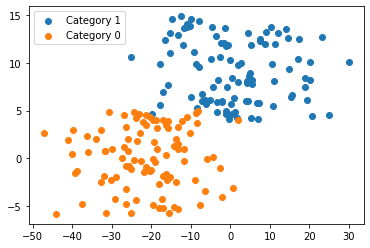

In [10]:
x1 = np.random.randn(100,1) * 10
y1 = np.random.uniform(low=4, high=15, size=(100,1))

x0 = np.random.randn(100,1) * 10 - 20
y0 = np.random.uniform(low=-6, high=5, size=(100,1))

data  = np.concatenate((np.concatenate((x1, y1), axis=1), np.concatenate((x0, y0), axis=1)), axis=0)
label = np.concatenate((np.ones(100), np.zeros(100)))

plt.scatter(x1, y1, label="Category 1")
plt.scatter(x0, y0, label="Category 0")
plt.legend()
plt.show()

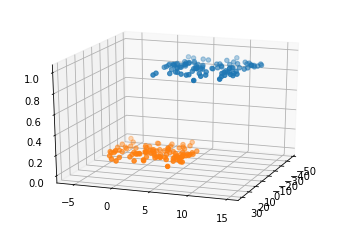

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(x1, y1, np.ones_like(x1))
ax.scatter(x0, y0, np.zeros_like(x0))
ax.view_init(20, 20)

---
Sigmoid function

\\[ s(x) = \frac{1}{1 + e^{-x}} \\]

The derivative is :
\\[ \dot{s}(x) = s(x) \times (1 - s(x)) \\]

In [12]:
def sigmoid(inp):
  return 1/(1 + np.exp(-inp))

def d_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))

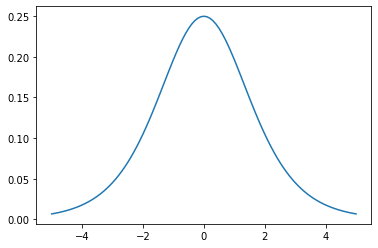

In [13]:
temp = np.linspace(-5, 5, 101)

# plt.plot(temp, sigmoid(temp), label="Sigmoid")
plt.plot(temp, d_sigmoid(temp), label="Derivative of sigmoid")
# plt.legend()
plt.show()

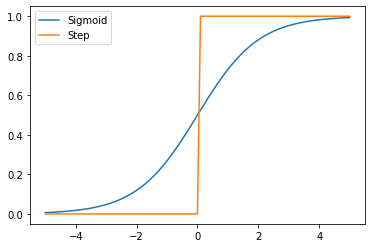

In [14]:
plt.plot(temp, sigmoid(temp), label="Sigmoid")
plt.plot(temp, temp > 0, label="Step")
plt.legend()
plt.show()

In [15]:
def vis_boundary(mx, my, b):
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z = sigmoid(mx*X + my*Y + b)

  c = plt.contourf(X, Y, Z, cmap='plasma')
  plt.colorbar(c)
  
  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if label[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not label[i]])
  
  plt.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
  plt.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
  plt.legend()
  plt.show()

In [72]:
def vis_boundary3D(mx, my, b):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z = sigmoid(mx*X + my*Y + b)

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if label[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not label[i]])
  
  ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
  ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  ax.legend()
  c = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.5)
  ax.view_init(20, -70)
  fig.show()

In [71]:
interact(vis_boundary, mx = widgets.FloatSlider(min=-10, max=10, value=1), my = widgets.FloatSlider(min=-10, max=10, value=1), b = widgets.FloatSlider(min=-50, max=50))

interactive(children=(FloatSlider(value=1.0, description='mx', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.vis_boundary>

In [65]:
interact(vis_boundary3D, mx = widgets.FloatSlider(min=-10, max=10, value=1), my = widgets.FloatSlider(min=-10, max=10, value=1), b = widgets.FloatSlider(min=-50, max=50))

interactive(children=(FloatSlider(value=1.0, description='mx', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.vis_boundary3D>

---
# Binary crossentropy loss

\\[ E(y, \hat{y}) = (\hat{y} \times -\log{y}) + ((1 - \hat{y}) \times - \log{(1-y)}) \\]

\\[ E(y, \hat{y}) = \frac{\sum_{i=0}^{N-1}((\hat{y_i} \times -\log{y_i}) + ((1 - \hat{y_i}) \times - \log{(1-y_i)}))}{N} \\]

That does look quite intimidating! But, we can make sense of it. Consider this :

$ \hat{y}_i $ can only have values 0 or 1. So, either one of the terms $(\hat{y_i} \times -\log{y_i})$ or $((1 - \hat{y_i}) \times - \log{(1-y_i)})$ appear at one time 

- When $ \hat{y}_i = 1 , E(y, \hat{y}) = -log(y) $

- When $ \hat{y}_i = 0 , E(y, \hat{y}) = -log(1 - y) $

For gradient descent, we need to know its gradient. It comes out to be :

\\[ \frac{\partial E (y, \hat{y})}{\partial y} = \frac{-\hat{y}}{y} + \frac{1-\hat{y}}{1-y} \\]

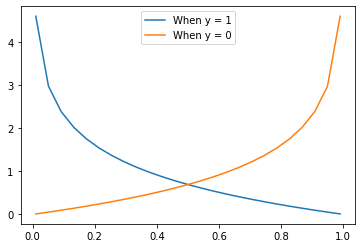

In [42]:
def bce_loss(act, pred, epsilon=1e-5):
  return np.average(-(act * np.log(pred + epsilon))-((1-act)*np.log(1-pred + epsilon)))

def d_bce_loss(act, pred, epsilon=1e-5):
  return -act / (pred + epsilon) + (1 - act)/(1 - pred + epsilon)

temp = np.linspace(0.01, 0.99, 25)
plt.plot(temp, -np.log(temp), label="When y = 1")
plt.plot(temp, -np.log(1-temp), label="When y = 0")
plt.legend()
plt.show()

---
# Logistic regression

### Forward pass :

![Logistic regression image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression.png?raw=1)

\\[ z\_in = (x \times Wx + y \times Wy + B)\\]
\\[ z = s(z\_in) = \frac{1}{1 + e^{-z\_in}}\\]

\\[ E(z, \hat{z}) = ((\hat{z} \times -\log{z}) + ((1-\hat{z}) \times -\log(1-z))) \\]

### Backward pass :

![Logistic regresssion backward pass image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression_back.png?raw=1)

\\[ \frac{\partial E}{\partial z} = \frac{-\hat{z}}{z} + \frac{1-\hat{z}}{2-z}\\]

\\[ \frac{\partial E}{\partial z\_in} = \frac{\partial E}{\partial z} \times \frac{d z}{d z\_in} = \frac{\partial E}{\partial z} \times z \times (1-z) \\]

\\[ \frac{\partial E}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times x\\]

\\[ \frac{\partial E}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times y\\]

\\[ \frac{\partial E}{\partial B} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial B} = \frac{\partial E}{\partial z\_in}\\]

In our code,

- ```d_z``` = $ \frac{\partial E}{\partial z} $
- ```d_zin``` = $ \frac{\partial E}{\partial z\_in} $
- ```d_wx``` = $ \frac{\partial E}{\partial Wx} $
- ```d_wy``` = $ \frac{\partial E}{\partial Wy} $
- ```d_b``` = $ \frac{\partial E}{\partial B}


 Error 8.472 


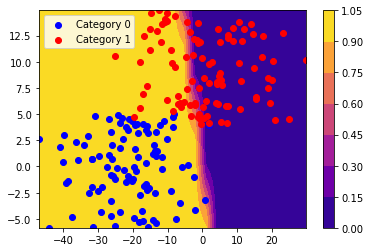

 Error 8.363 


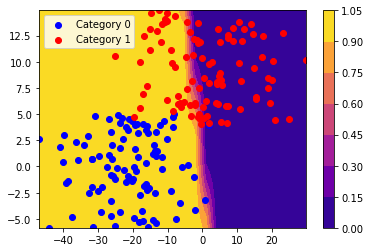

 Error 8.257 


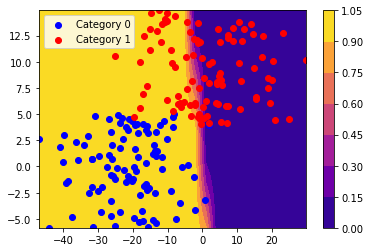

 Error 8.152 


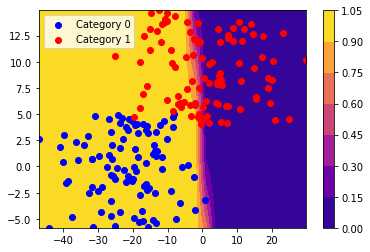

 Error 8.045 


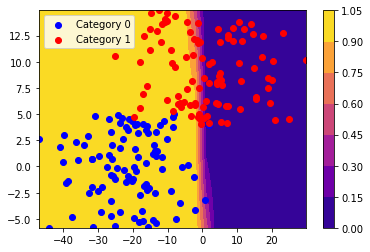

 Error 7.933 


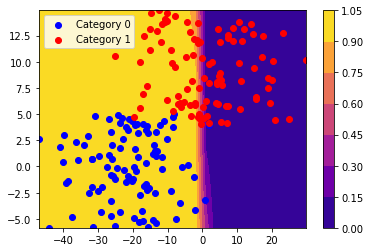

 Error 7.820 


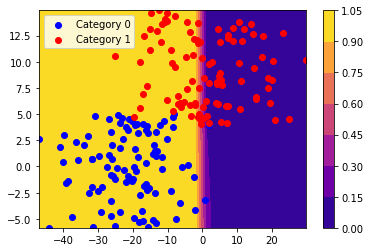

 Error 7.704 


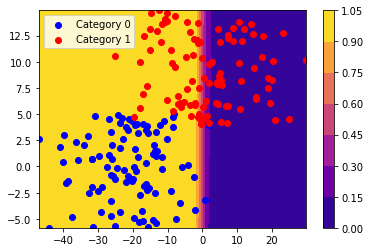

 Error 7.577 


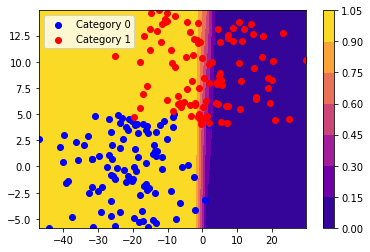

 Error 7.429 


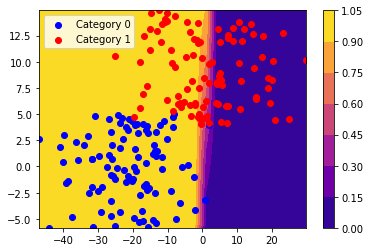

 Error 7.256 


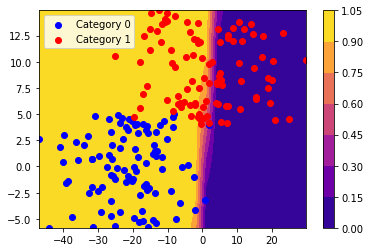

 Error 7.052 


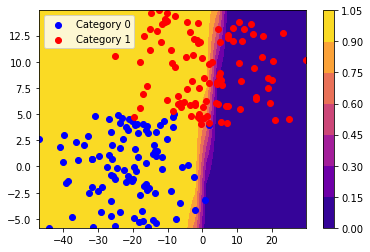

 Error 6.818 


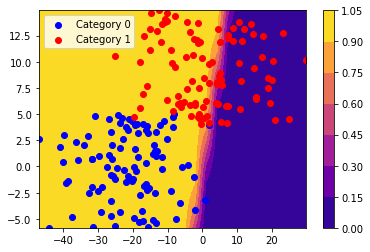

 Error 6.566 


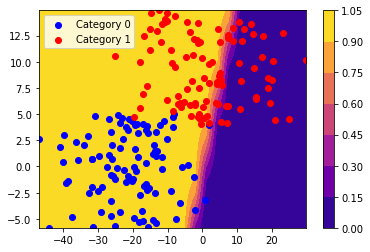

 Error 6.293 


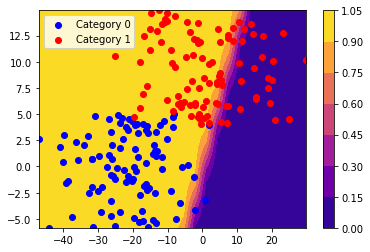

 Error 5.908 


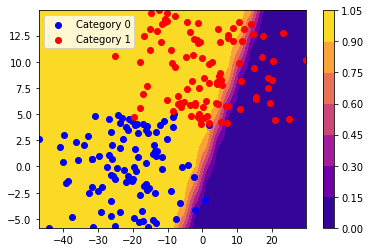

 Error 5.160 


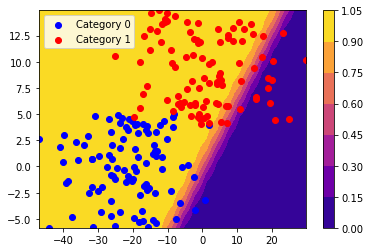

 Error 2.908 


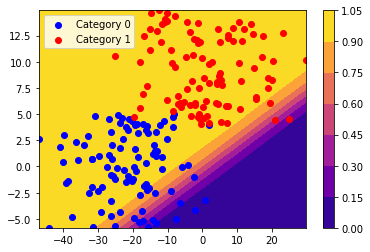

 Error 0.158 


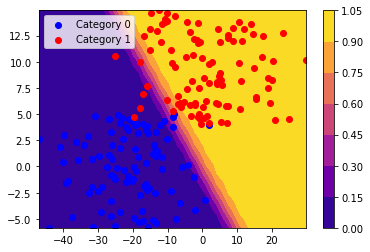

 Error 0.131 


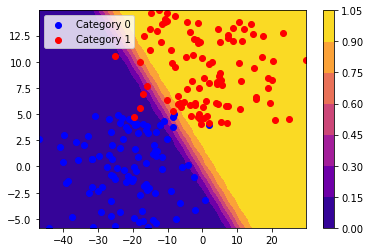

In [75]:
# First, initialize slope and intercept randomly
wx = np.random.randn()
wy = np.random.randn()
b  = np.random.randn()

# Number of iterations
num_iter = 20

# Learning rate is the factor that is multiplied with the gradient
learning_rate = 1e-1       # Optimum rate from trial and error

# To store values of slope, intercept and error over training, for visualizing later
param_hist = []
error_hist = []

# Start training
for i in range(num_iter):
  z_in = wx * data[:,0] + wy * data[:,1] + b
  z    = sigmoid(z_in)

  # Compute error
  error = bce_loss(label, z)
  print(" Error %.3f "%(error))

  # Visualize the current prediction
  vis_boundary(wx, wy, b)               # View in 2D
  # vis_boundary3D(wx, wy, b)             # View in 3D
  
  # Append to history to visualize later
  param_hist.append([wx, wy, b])
  error_hist.append(error)

  # Derivative of error with respect to z
  d_z = d_bce_loss(label, z)

  # Back propagate through sigmoid function
  d_zin = d_z * d_sigmoid(z_in)
  
  # Derivative of errors with respect to slopes and intercepts
  d_wx = d_zin * data[:,0]
  d_wy = d_zin * data[:,1]
  d_b  = d_zin

  # Update predictions by gradient descent rule
  wx = wx - learning_rate * np.mean(d_wx)
  wy = wy - learning_rate * np.mean(d_wy)
  b  = b  - learning_rate * np.mean(d_b)

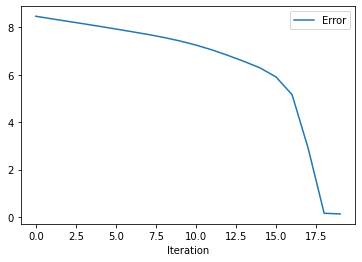

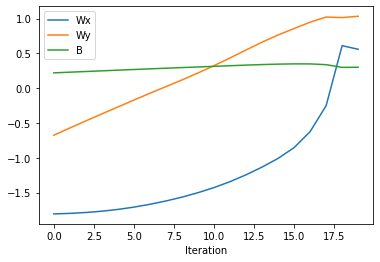

In [76]:
plt.plot(error_hist, label="Error")
plt.xlabel("Iteration")
plt.legend()
plt.show()

plt.plot([params[0] for params in param_hist], label="Wx")
plt.plot([params[1] for params in param_hist], label="Wy")
plt.plot([params[2] for params in param_hist], label="B")
plt.xlabel("Iteration")
plt.legend()
plt.show()